In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.nn import convolution

from celluloid import Camera
from matplotlib import animation, rc
from IPython.display import HTML
from IPython.display import clear_output


In [2]:
N = 1000
dt = 0.01
h = 1

In [36]:
_U = np.zeros(shape=(N, N, 2))
_I = np.zeros(shape=(N, N, 2))
_B = np.zeros(shape=(N, N, 1))
_p = np.zeros(shape=(N, N, 1))

_R = 10000 * np.ones(shape=(N, N, 1))
_eps = np.ones(shape=(N, N, 1))
_mu = np.ones(shape=(N, N, 1))

In [37]:
X = np.array([[0, 0, 0], [1, -1, 0],[0, 0, 0]])
Y = np.array([[0, 1, 0], [0, -1, 0],[0, 0, 0]])
_continuity_filter = np.stack([X, Y]).reshape((2, 3, 3, 1)).transpose(1,2,0,3)

In [38]:
X = np.array([[0, 0, 0], [0, 1, 0],[0, -1, 0]])
Y = np.array([[0, 0, 0], [0, -1, 1],[0, 0, 0]])
_faraday_filter = np.stack([X, Y]).reshape((2, 3, 3, 1)).transpose(1,2,0,3) / h ** 2

In [39]:
X = np.array([[0, 1, 0], [0, -1, 0],[0, 0, 0]])
Y = np.array([[0, 0, 0], [-1, 1, 0],[0, 0, 0]])
_ampere_filter = np.stack([X, Y]).reshape((2, 3, 3, 1)).transpose(1,2,3,0) * h

In [40]:
Y

array([[ 0,  0,  0],
       [-1,  1,  0],
       [ 0,  0,  0]])

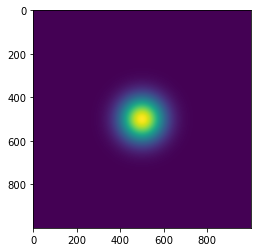

In [41]:
x = np.linspace(0, 10, N)
mesh = np.stack(np.meshgrid(x, x))

_B = np.exp(-np.sum(np.square((mesh-np.array([5,5]).reshape((2,1,1)))), axis=0))

plt.imshow(_B)

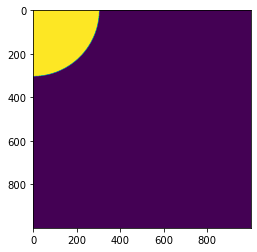

In [42]:
x = np.linspace(0, 10, N)
mesh = np.stack(np.meshgrid(x, x))
U = np.exp(-np.sum(np.square(mesh), axis=0))
plt.imshow(U>0.0001)
_R[U>0.0001]=0.1

In [43]:
_continuity_filter[:,:,0,0]

array([[ 0,  0,  0],
       [ 1, -1,  0],
       [ 0,  0,  0]])

In [44]:
_continuity_filter[:,:,1,0]

array([[ 0,  1,  0],
       [ 0, -1,  0],
       [ 0,  0,  0]])

In [57]:
faraday_filter = tf.constant(_faraday_filter, name='faraday_filter', dtype=tf.float64)
ampere_filter = tf.constant(_ampere_filter, name='ampere_filter', dtype=tf.float64)
continuity_filter = tf.constant(_continuity_filter, name='continuity_filter', dtype=tf.float64)

eps = tf.constant(_eps.reshape((1, N, N, 1)), name='dielectricity', dtype=tf.float64)
mu = tf.constant(_mu.reshape((1, N, N, 1)), name='permitivity', dtype=tf.float64)
R = tf.constant(_R.reshape((1, N, N, 1)), name='resistance', dtype=tf.float64)
U = tf.Variable(_U.reshape((1, N, N, 2)), name='e_field', dtype=tf.float64)
I = tf.Variable(_I.reshape((1, N, N, 2)), name='current', dtype=tf.float64)
B = tf.Variable(_B.reshape((1, N, N, 1)), name='b_field', dtype=tf.float64)
p = tf.Variable(_p.reshape((1, N, N, 1)), name='charge_density', dtype=tf.float64)

In [58]:
class cam():
    
    def __init__(self, ):
        self.fig, self.axs = plt.subplots(2, 2, figsize=(10,10))
        self.camera = Camera(self.fig)
        
    def plot(self, rp, i, v, b):
        self.axs[0, 0].imshow(rp)
        self.axs[0, 0].set_title('resistance/charge density')
        self.axs[0, 1].quiver(np.linspace(0,10,50),np.linspace(0,10,50), i[::20,::20,0], i[::20,::20,1], scale=1)
        self.axs[0, 1].set_title('current')
        self.axs[1, 0].imshow(b, vmin=-1, vmax=1)
        self.axs[1, 0].set_title('magnetic field')
        self.axs[1, 1].quiver(np.linspace(0,10,50),np.linspace(0,10,50), v[::20,::20,0], v[::20,::20,1], scale=3)
        self.axs[1, 1].set_title('electric field')
        self.fig.set_figheight(15)
        self.fig.set_figwidth(15)
        self.camera.snap()
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

KeyboardInterrupt: 

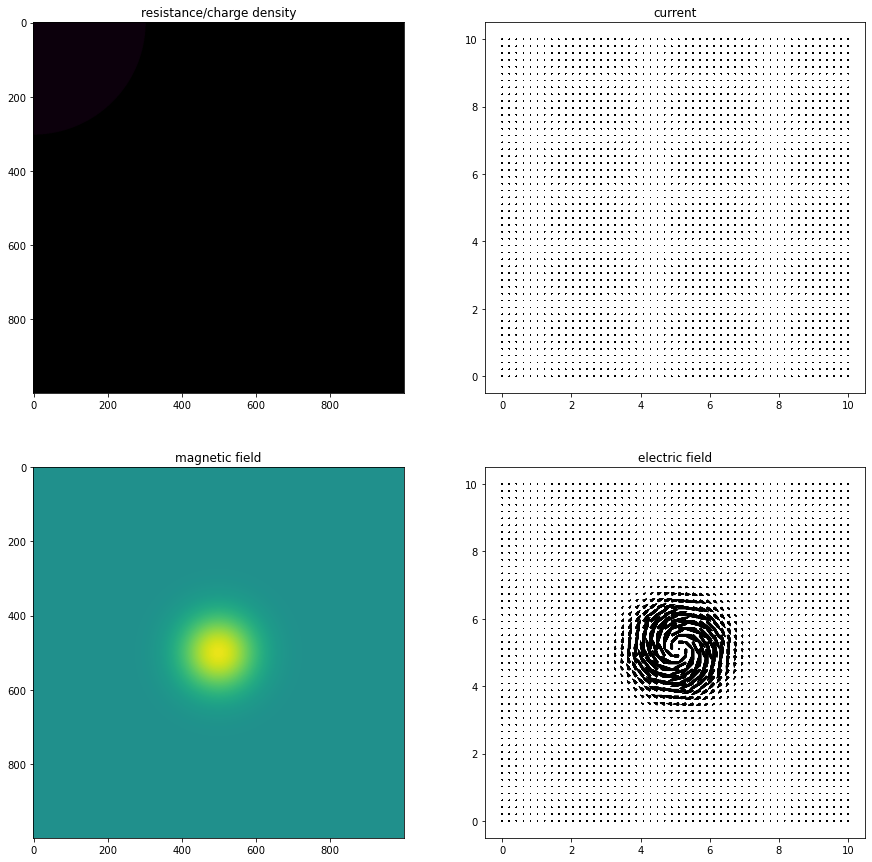

In [59]:
#%%capture
cc = cam()
for jter in range(20000):
    I = U / R
    dB = convolution(U, filters=faraday_filter, padding='SAME')
    dp = convolution(I, filters=continuity_filter, padding='SAME')
    dU = (convolution(B, filters=ampere_filter, padding='SAME') / eps / mu - I / eps)

    U.assign_add(dU * dt)
    B.assign_add(dB * dt)
    p.assign_add(dp * dt)
    if jter % 10 ==0:
        r = np.squeeze(R.numpy())
        _p = np.squeeze(p.numpy())
        rp = np.stack([r,_p,r]).transpose(2,1,0)
        rp = (125*rp).astype(np.int8)
        j = tf.squeeze(I).numpy()
        cc.plot(rp, j, tf.squeeze(U).numpy(), tf.squeeze(B).numpy())
anim = cc.camera.animate(blit=True)
clear_output()

In [ ]:
anim = cc.camera.animate(blit=True)
clear_output()

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
        fig, axs = plt.subplots(2, 2)

        camera = Camera(fig)
        

        plt.figure(figsize=(60, 60))
        axs[0, 0].imshow(rp)


In [ ]:
fig.show()